## 1. Problem Statement
- This Project understands how the student's performance is affected by other variables such Gender, Ethinicity, Parentel level of education, Lunch and Test preprations

## 2. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Collection

In [2]:
# importing data
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
186,male,group E,high school,standard,none,80,76,65
938,male,group D,some college,standard,completed,85,81,85
159,male,group D,associate's degree,free/reduced,none,66,62,64
414,female,group C,bachelor's degree,free/reduced,completed,51,72,79
713,male,group D,master's degree,standard,none,81,81,84


In [4]:
df.shape

(1000, 8)

### Dataset Information 
- gender: sex of students ['male', 'felale']
- race/ethinicity: ethinicity of studehts -> [Group A,B,C,D,E]
- parental level of education : parent's education -> [bachelor's degree,some college,master's degree,associate's degree,high school]
- lunch : having lunch before test [standard, free/reduced]
- test preparation course : complete or not complete before test
- math score : marks scored in maths
- reading score : marks scored in reading
- writing score : marks scored in writing

## 4. Data Checks Performed 🧪
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

In [5]:
print('Null Value Cout')
df.isnull().sum()

Null Value Cout


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
print('Duplicate rows: ')
df.duplicated().sum()

Duplicate rows: 


0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights: 
- no null and duplicate values, cleaned data
- all 3 scores have similar mean, standard deviation and other behaviours

In [24]:
df['average score'] = df.apply(lambda row : round((row['math score'] + row['reading score'] + row['writing score']) / 3,2), axis=1)

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


## 5. Data Exploration ( Visualization )

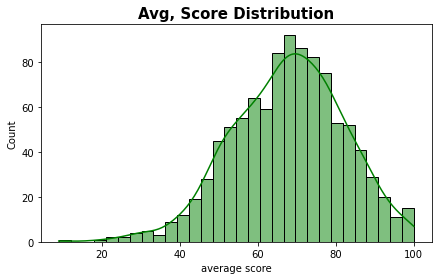

In [28]:
plt.figure(figsize=(7,4))
sns.set_palette('husl')
plt.title('Avg, Score Distribution', fontsize=15, fontweight='bold')
sns.histplot(df['average score'],bins=30,kde=True,color='g');

70% Scores lie between 50 & 80,
30% is the rest scored

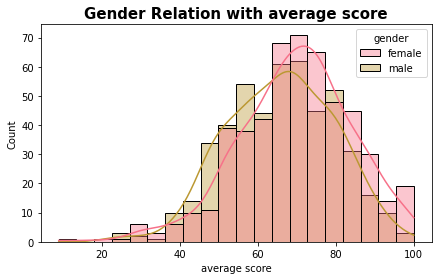

In [36]:
plt.figure(figsize=(7,4))
sns.set_palette('husl')
plt.title('Gender Relation with average score', fontsize=15, fontweight='bold')
sns.histplot(x=df['average score'],bins=20,hue=df['gender'],kde=True,alpha=0.4);

70 is females average score,
65 is males average score

## Insights

- Female students tend to perform well than male students.

In [37]:
df['grade'] = df['average score'].map(lambda x: 'F' if x<33 else 'E' if x<50 else 'D' if x<60 else 'C' if x<70 else 'B' if x<80 else 'A')

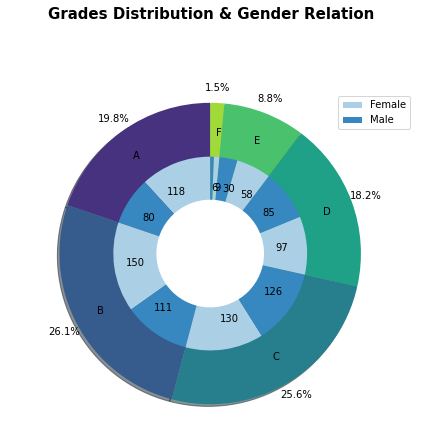

In [39]:
from matplotlib.patches import Patch

labels = ['A','B','C','D','E','F']
colors = sns.color_palette('Blues',2)
values_gender = [118,80,150,111,130,126,97,85,58,30,9,6]
values = [198,261,256,182,88,15]
plt.figure(figsize=(6,6))

plt.title('Grades Distribution & Gender Relation', fontsize=15, fontweight='bold',y=1.2)

plt.pie(x=values,autopct='%1.1f%%',shadow=True,colors=sns.color_palette('viridis',n_colors=6), radius=1.4,startangle=90,pctdistance=1.1,labeldistance=0.8,labels=labels)
plt.pie(x=values_gender,shadow=True,colors=colors,labels=values_gender, radius=0.9,startangle=90,labeldistance=0.68)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


legend_elements = [Patch(facecolor=colors[0], edgecolor='w',label='Female'),
                  Patch(facecolor=colors[1], edgecolor='w',label='Male')]
plt.legend(handles=legend_elements, loc='upper right')


plt.axis('equal')
plt.tight_layout()
plt.show()

In [42]:
out = (df['average score'][df['average score']>=95 ][df['gender'] == "male"].count(),
df['average score'][df['average score']>=95 ][df['gender'] == "female"].count())

out

(3, 19)

19 Females scored above 95,
3 Males scored above 95

## Multivariate analysis

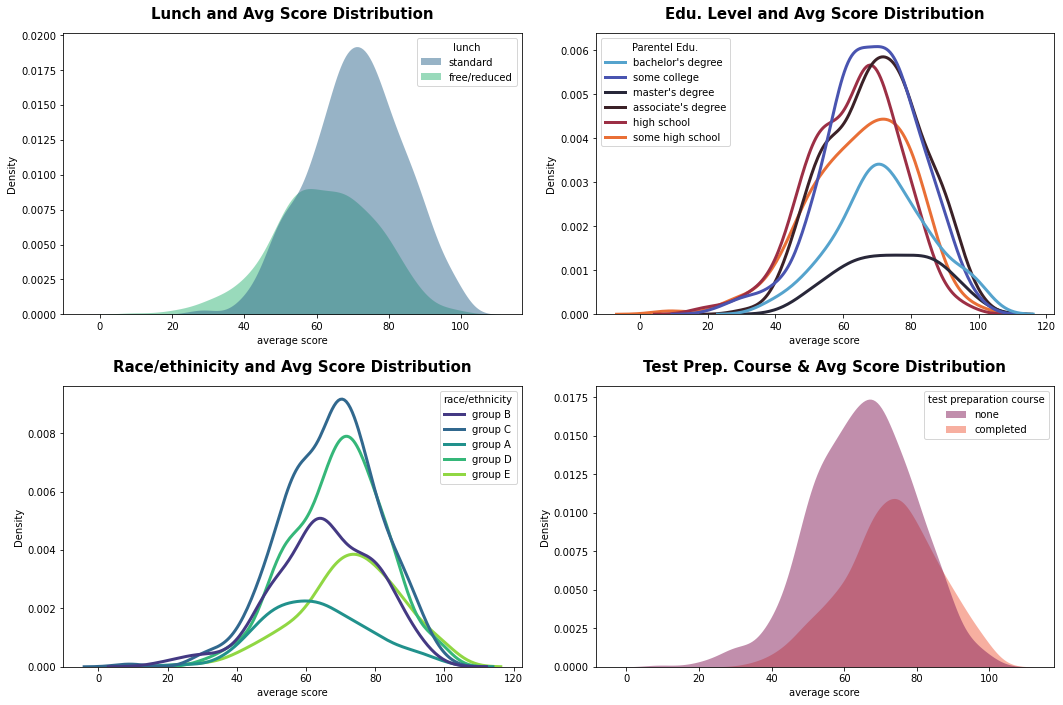

In [43]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
sns.color_palette("rocket", as_cmap=True)


plt.subplot(221)
plt.title('Lunch and Avg Score Distribution', fontsize=15, fontweight='bold',y=1.03)
sns.kdeplot(data=df,x='average score',hue='lunch', 
           fill=True, common_norm=True, palette="viridis", 
           alpha=.5, linewidth=0,)

plt.subplot(224)
plt.title('Test Prep. Course & Avg Score Distribution', fontsize=15, fontweight='bold',y=1.03)
sns.kdeplot(data=df,x='average score',hue='test preparation course',
            fill=True, common_norm=True, palette="rocket", 
            alpha=.5, linewidth=0)


plt.subplot(222)
plt.title('Edu. Level and Avg Score Distribution', fontsize=15, fontweight='bold',y=1.03)
g = sns.kdeplot(data=df,x='average score',hue='parental level of education',
            fill=False, common_norm=True, palette="icefire", 
            alpha=1, linewidth=3, )
sns.move_legend(g, "upper left", title='Parentel Edu.')


plt.subplot(223)
plt.title('Race/ethinicity and Avg Score Distribution', fontsize=15, fontweight='bold',y=1.03)
sns.kdeplot(data=df,x='average score',hue='race/ethnicity',
            fill=False, common_norm=True, palette="viridis", 
            alpha=1, linewidth=3,)

fig.tight_layout(pad=1.5)
plt.show()

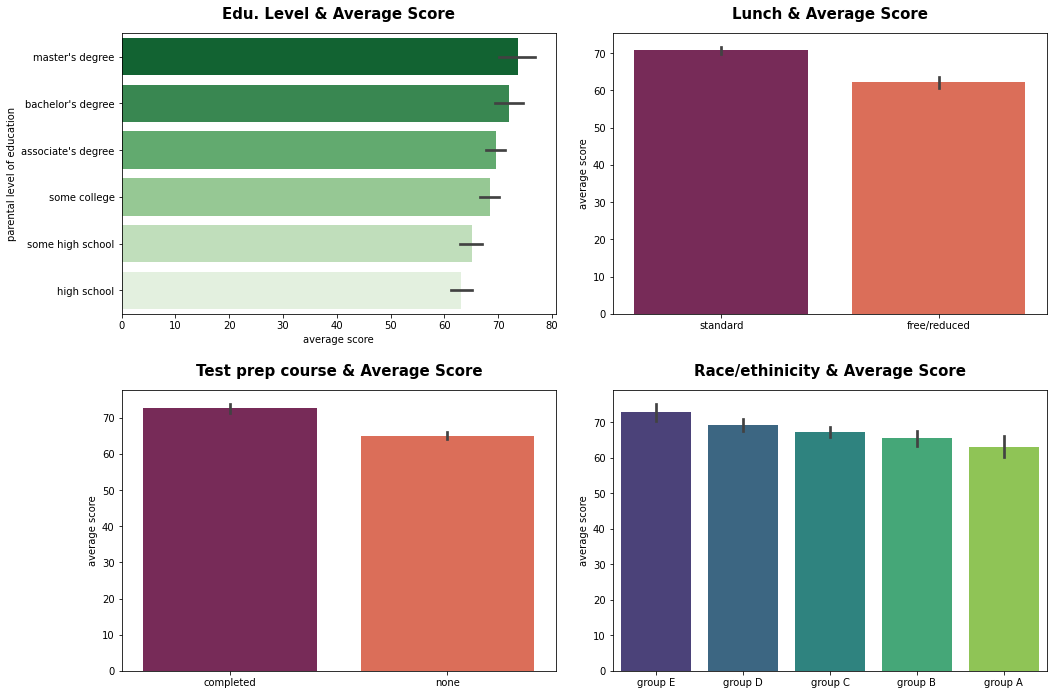

In [44]:
# df.groupby('parental level of education')['average score'].mean().plot.bar()
fig, ax = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
plt.title(label='Edu. Level & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, y='parental level of education', x='average score', palette='Greens_r', order=['master\'s degree','bachelor\'s degree','associate\'s degree', 'some college','some high school','high school'])



plt.subplot(222)
plt.title(label='Lunch & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, x='lunch', y='average score', palette='rocket')
plt.xlabel('')

plt.subplot(223)
plt.title(label='Test prep course & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, x='test preparation course', y='average score', palette='rocket', order=['completed','none'])
plt.xlabel('')

plt.subplot(224)
plt.title(label='Race/ethinicity & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, x='race/ethnicity', y='average score', palette='viridis', order=['group E','group D','group C', 'group B','group A'])
plt.xlabel('')


fig.tight_layout(pad=2)
plt.show()

## Insights 
- Standard lunch helps perform well in exams.
- Race/ethnicity has an impact on students average performance.
- Test Prepration helps in scoring.
- Parental level of education has bad effects at lower levels

In [47]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,average score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837303


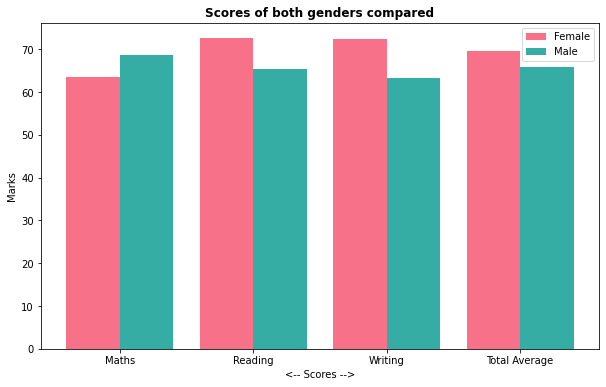

In [48]:
plt.figure(figsize=(10, 6))
sns.set_palette('husl',2)

X = ['Maths','Reading','Writing','Total Average']
Ygirls = gender_group.values[0]
Zboys = gender_group.values[1]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("<-- Scores -->")
plt.ylabel("Marks")
plt.title("Scores of both genders compared", fontweight='bold')
plt.legend()
plt.show()

4 Males failed in Maths,
15 Females got failed in Maths

## Demographic Analysis of Students

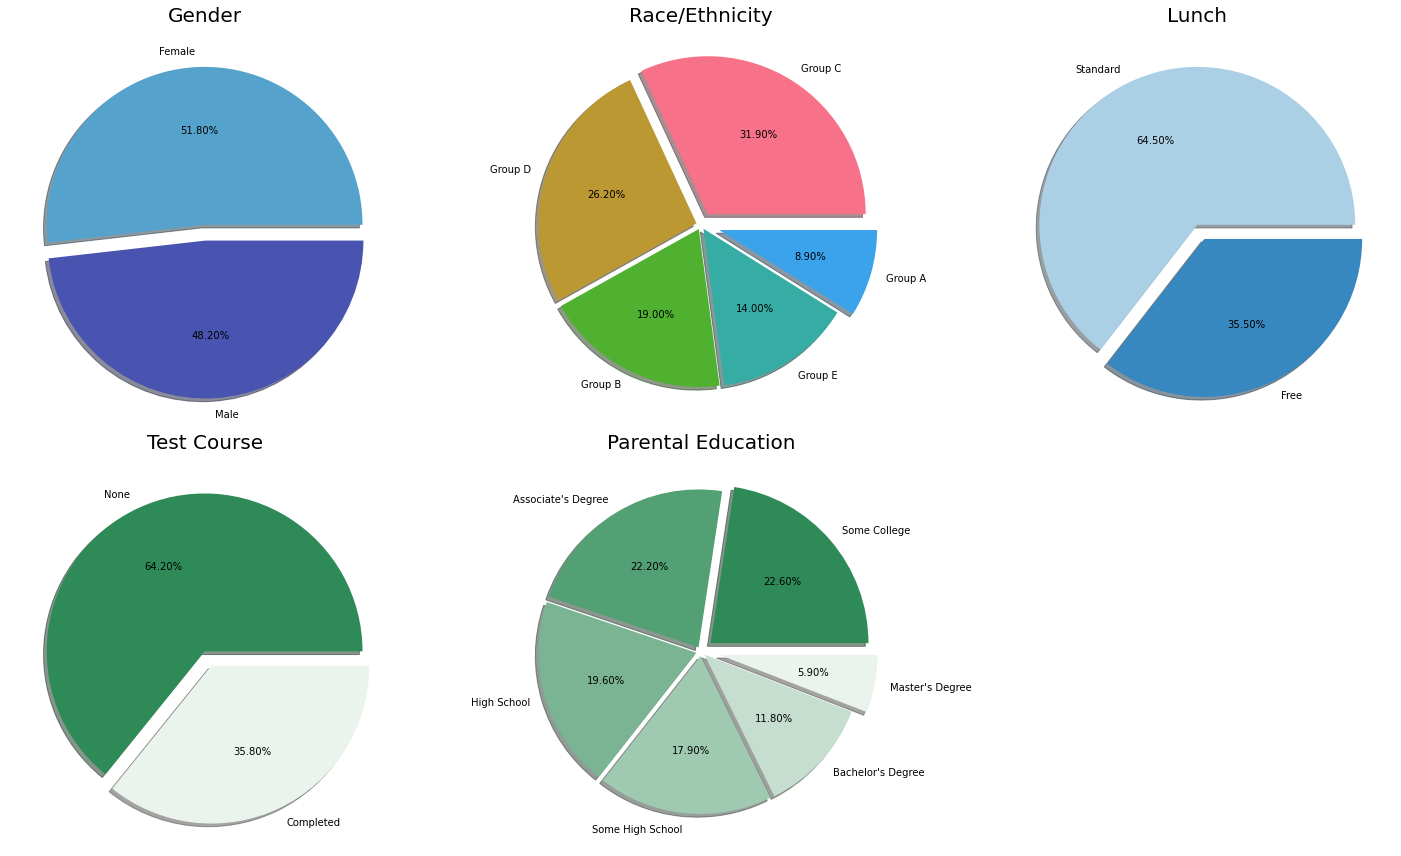

In [50]:
plt.rcParams['figure.figsize'] = (20, 12)
theme = plt.get_cmap('jet')


plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'


colors = sns.color_palette('icefire')[:2]
plt.pie(size, labels = labels,autopct = '%.2f%%',colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'


colors = sns.color_palette('husl')[:5]
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.08,0.03,0.03,0.03,0.12],shadow=True)
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'

colors = sns.color_palette('Blues', 2)
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'

colors = sns.light_palette("seagreen", 2, reverse=True)
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"


colors = sns.light_palette("seagreen", reverse=True)[:6]
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.08,0.03,0.03,0.03,0.03,0.12],shadow=True)
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Insights 
- The number of male and female students is nearly equal.
- The largest number of students belongs to Group C.
- A greater number of students had standard lunch.
- The majority of students did not enroll in any test preparation course.
- The number of students whose parents have "Some College" education is the highest, closely followed by those with an "Associate's Degree".

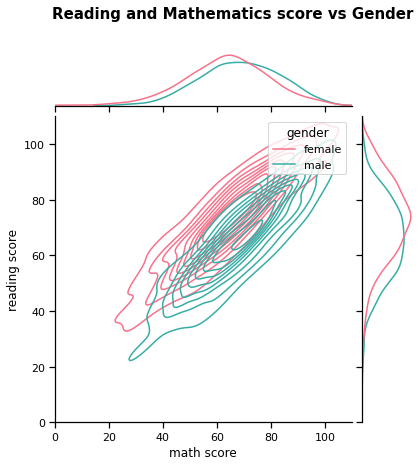

In [51]:
sns.set_context("notebook")
sns.jointplot(data=df, x="math score", y="reading score", hue="gender", kind="kde",xlim=(0,110),ylim=(0,110),palette='husl')
plt.title('Reading and Mathematics score vs Gender', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

Males score well in maths as compared to reading while, Females have the opposite trend

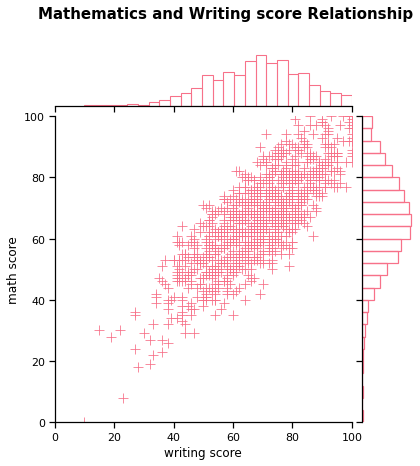

In [52]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),xlim=(0,100), ylim=(0,100)
)
plt.title('Mathematics and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

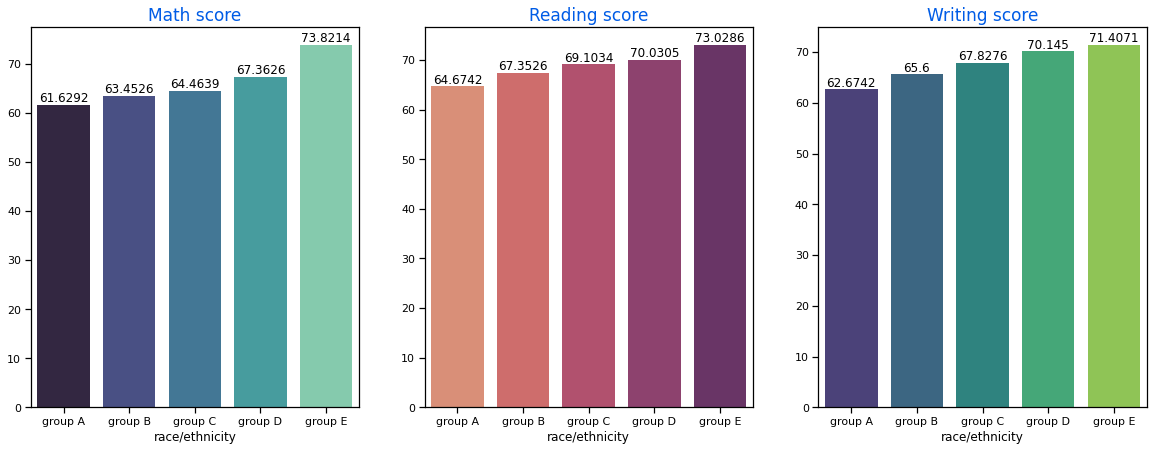

In [53]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=17)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=17)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=12)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'viridis',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=17)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=12)

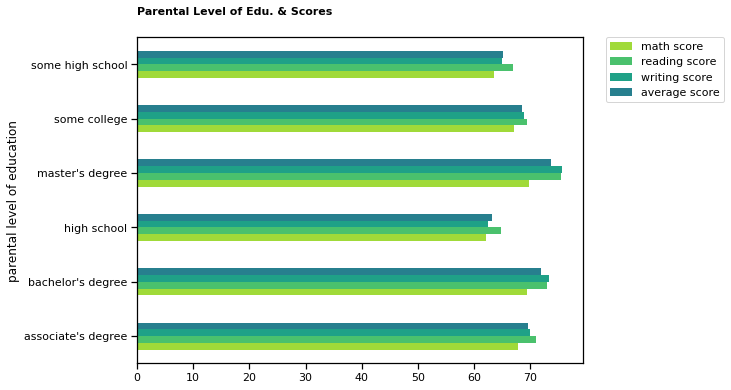

In [54]:
sns.set_palette("viridis_r")
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(8,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Parental Level of Edu. & Scores', fontsize=11, fontweight=600,y=1.05,loc="left")

plt.show()

## Failures Analysis (Demographic Data)

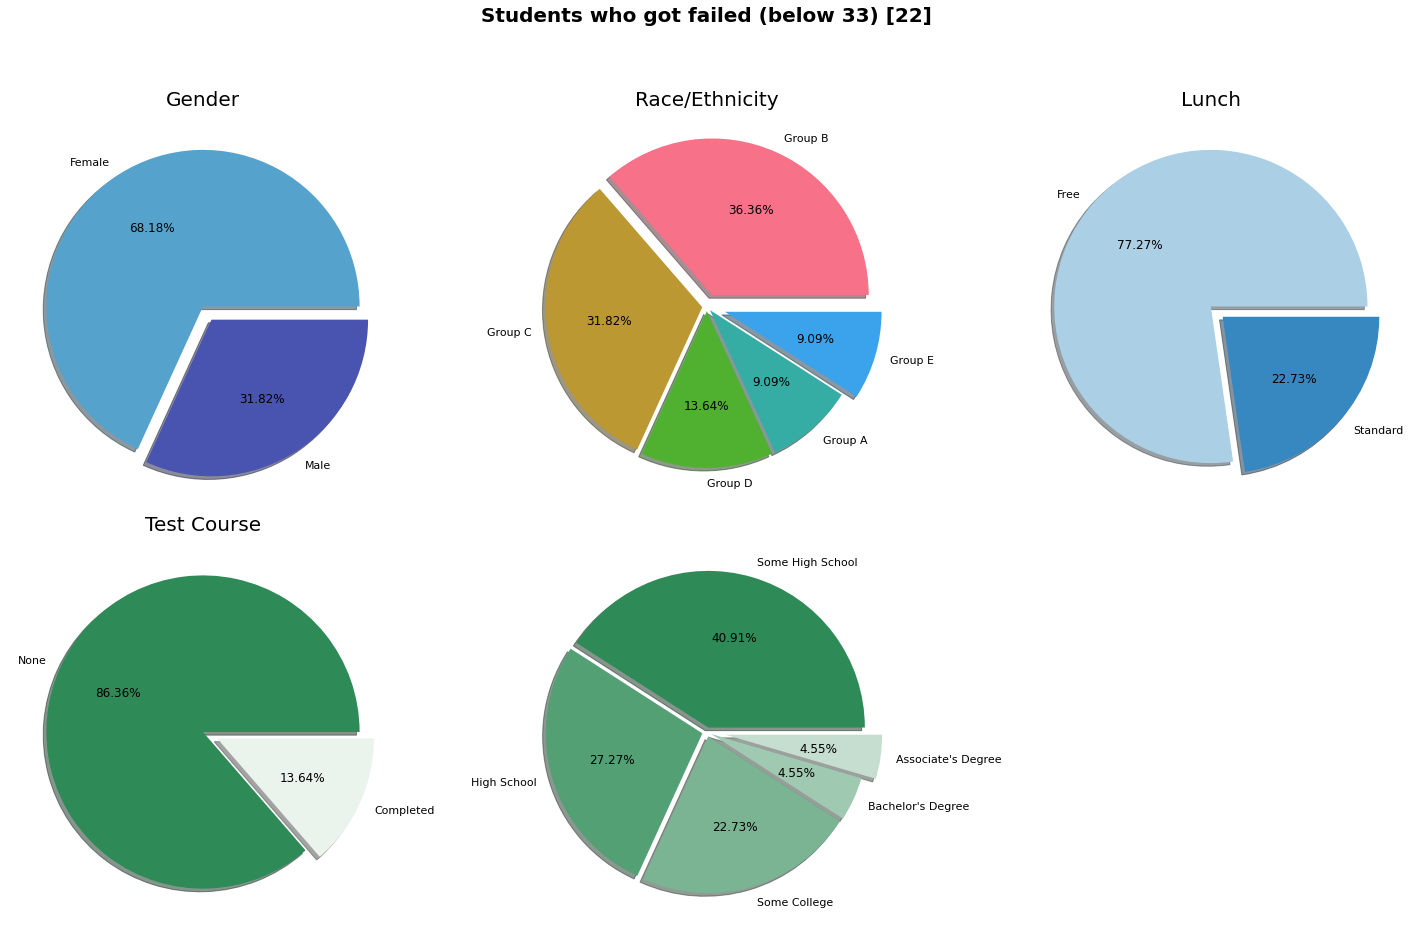

In [56]:
f1 = df[df['math score']<33 ]
f2 = df[df['reading score']<33 ]
f3 = df[df['writing score']<33 ]
f = pd.concat([f1,f2,f3],join='outer').drop_duplicates()


plt.rcParams['figure.figsize'] = (20, 12)
theme = plt.get_cmap('jet')

plt.title('Students who got Failed ',)


plt.subplot(2, 3, 1)
size = f['gender'].value_counts()
labels = ['Female', 'Male']


colors = sns.color_palette('icefire')[:2]
plt.pie(size, labels = labels,autopct = '%.2f%%',colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = f['race/ethnicity'].value_counts()
labels = ['Group B', 'Group C','Group D','Group A','Group E']


colors = sns.color_palette('husl')[:5]
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.08,0.03,0.03,0.03,0.12],shadow=True)
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 3)
size = f['lunch'].value_counts()
labels = [ 'Free','Standard']

colors = sns.color_palette('Blues', 2)
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = f['test preparation course'].value_counts()
labels = ['None', 'Completed']

colors = sns.light_palette("seagreen", 2, reverse=True)
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = f['parental level of education'].value_counts()
labels = ['Some High School','High School','Some College',"Bachelor's Degree","Associate's Degree"]


colors = sns.light_palette("seagreen", reverse=True)[:6]
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.03,0.03,0.03,0.03,0.12],shadow=True)
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.title('Students who got failed (below 33) [22]', fontsize=20, fontweight='bold',y=2.3,loc="center")

plt.show()

- Female students were the majority among those who failed.
- The majority of failed students did not complete their test preparation course.
- A significant number of failed students were receiving free lunch.

## Toppers Analysis ( Demographic Data )

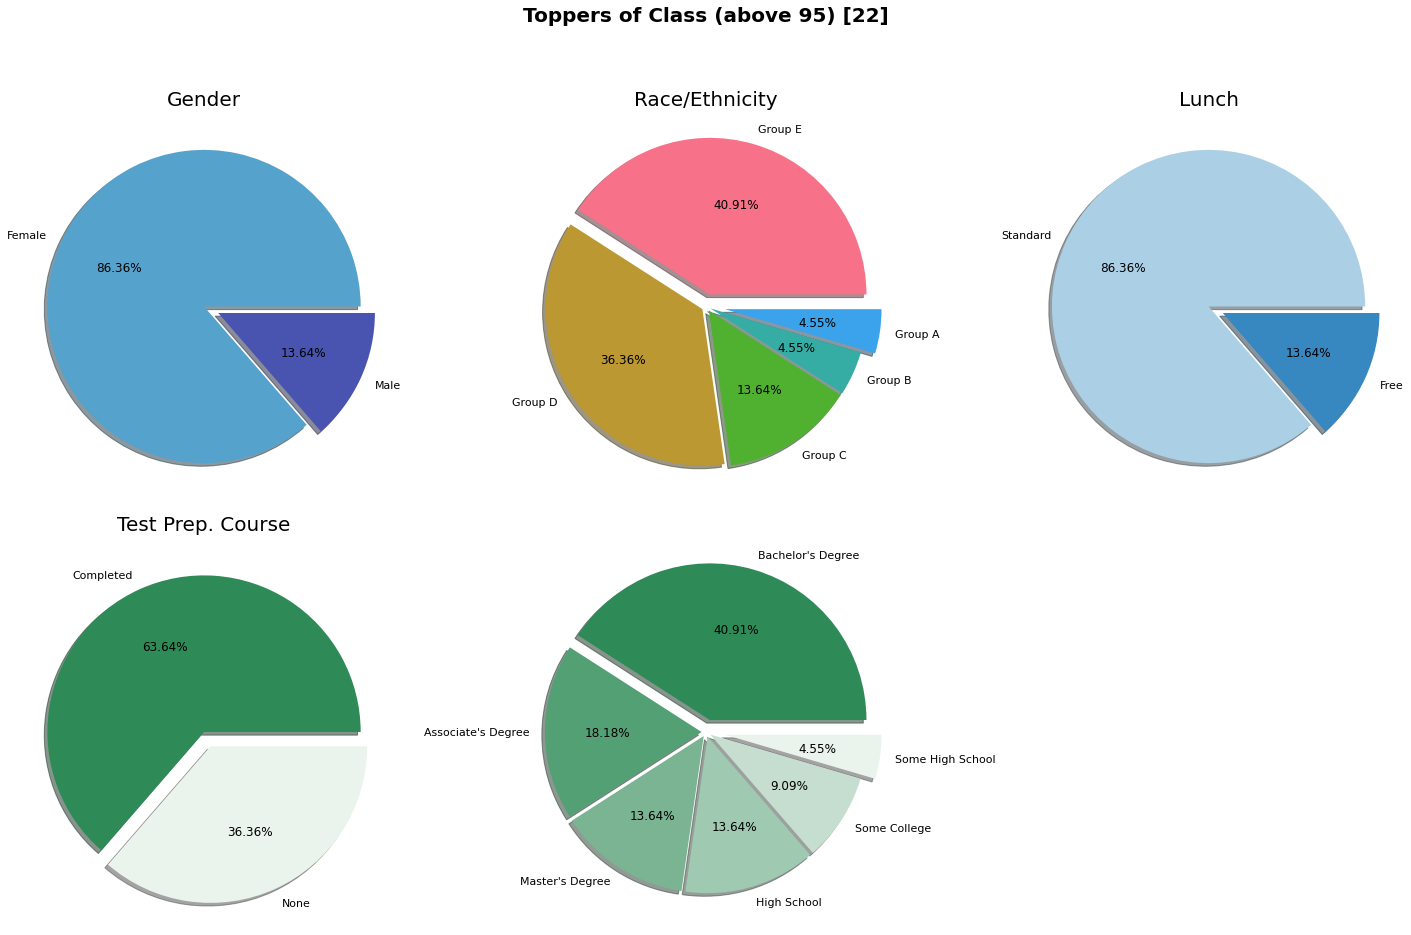

In [57]:
f1 = df[df['average score']>95]
f=f1

plt.rcParams['figure.figsize'] = (20, 12)
theme = plt.get_cmap('jet')

plt.title('Students who got Failed ',)


plt.subplot(2, 3, 1)
size = f['gender'].value_counts()
labels = ['Female', 'Male']


colors = sns.color_palette('icefire')[:2]
plt.pie(size, labels = labels,autopct = '%.2f%%',colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = f['race/ethnicity'].value_counts()
labels = ['Group E', 'Group D','Group C','Group B','Group A']


colors = sns.color_palette('husl')[:5]
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.08,0.03,0.03,0.03,0.12],shadow=True)
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 3)
size = f['lunch'].value_counts()
labels = ['Standard', 'Free']

colors = sns.color_palette('Blues', 2)
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = f['test preparation course'].value_counts()
labels = ['Completed','None']

colors = sns.light_palette("seagreen", 2, reverse=True)
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.0,0.1],shadow=True)
plt.title('Test Prep. Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = f['parental level of education'].value_counts()
labels = ["Bachelor's Degree","Associate's Degree","Master's Degree",'High School','Some College','Some High School',]


colors = sns.light_palette("seagreen", reverse=True)[:6]
plt.pie(size,labels = labels,autopct = '%.2f%%', colors=colors,explode=[0.08,0.03,0.03,0.03,0.03,0.12],shadow=True)
plt.title('Test Prep. Course', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.title('Toppers of Class (above 95) [22]', fontsize=20, fontweight='bold',y=2.3,loc="center")

plt.show()

- Females dominate the top ranks.
- Most students had standard lunch.
- Many completed test preparation course.

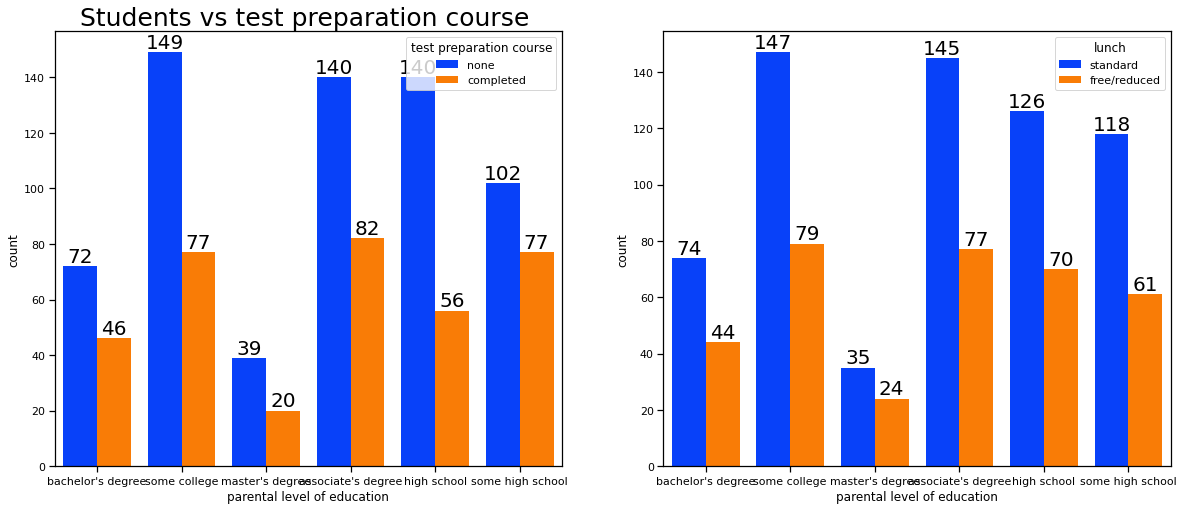

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

## Miscellaneous

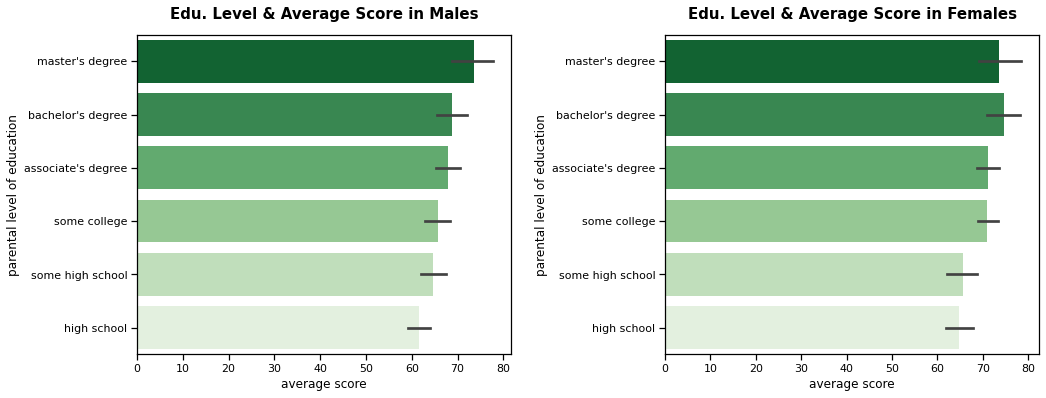

In [60]:
# df.groupby('parental level of education')['average score'].mean().plot.bar()
# df = df[df['gender']=='male']
fig, ax = plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.title(label='Edu. Level & Average Score in Males',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df[df['gender']=='male'], y='parental level of education', x='average score', palette='Greens_r', order=['master\'s degree','bachelor\'s degree','associate\'s degree', 'some college','some high school','high school'])


plt.subplot(122)
plt.title(label='Edu. Level & Average Score in Females',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df[df['gender']=='female'], y='parental level of education', x='average score', palette='Greens_r', order=['master\'s degree','bachelor\'s degree','associate\'s degree', 'some college','some high school','high school'])



fig.tight_layout(pad=2)
plt.show()

- Parental education level affects males' marks more than females'.

## Finally, the Pair-plot

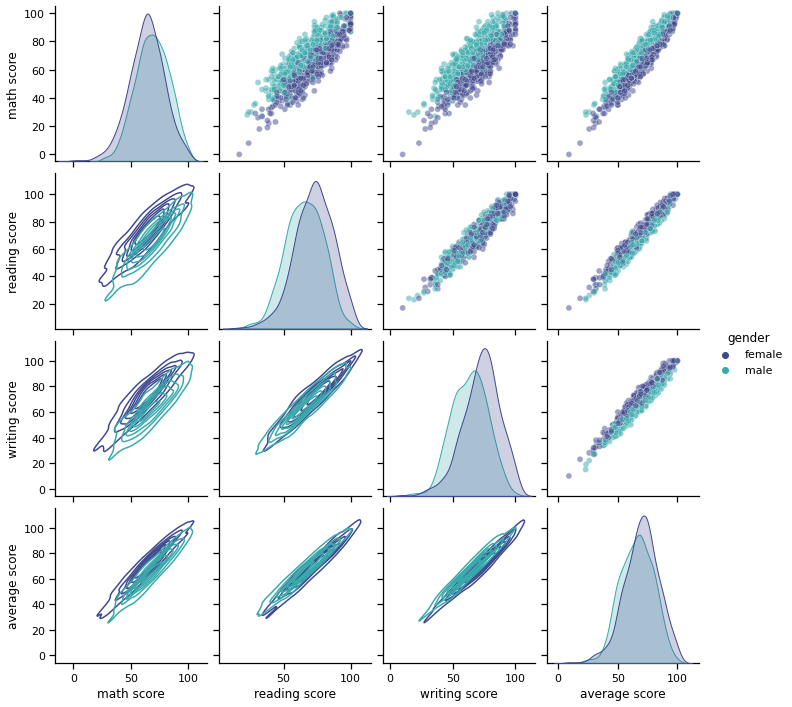

In [61]:
g = sns.pairplot(df,hue = 'gender',diag_kind='kde', plot_kws={ 'alpha': 0 }, palette='mako')
g.map_lower(sns.kdeplot,levels=7,color='0.2')
g.map_upper(sns.scatterplot,palette='mako',alpha=0.5)
plt.show()

## 6. Conclusion
- Our analysis shows that female students have consistently outperformed their male counterparts in all areas except The Maths.
- The majority of students had standard lunch and did not enroll in any test preparation course.
- Additionally, we found that students whose parents have "Some College" and "Associate's degree" education were the most represented in our study.
- Also, Parental education level affects males' marks more than females'.
- And, females dominated in both top ranks and failed students.